# Analysis of granural PAS data set

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# download the data

data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
data_19_20 = pd.read_csv(".\data\PAS_ward_level_FY_19_20.csv")
data_20_21 = pd.read_csv(".\data\PAS_ward_level_FY_20_21.csv")


C:\Users\wang-\AppData\Local\Temp\ipykernel_19708\2865077880.py:3: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,35,177,410,411,412,415,416,417,418,419,420,421,422,423) have mixed types. Specify dtype option on import or set low_memory=False.
  data_15_17 = pd.read_csv(".\data\PAS_ward_level_FY_15_17.csv")
C:\Users\wang-\AppData\Local\Temp\ipykernel_19708\2865077880.py:4: DtypeWarning: Columns (30,31,32,98,99,100,101,102,103,104,105,125,126,127,199,200) have mixed types. Specify dtype option on import or set low_memory=False.
  data_17_18 = pd.read_csv(".\data\PAS_ward_level_FY_17_18.csv")
C:\Users\wang-\AppData\Local\Temp\ipykernel_19708\2865077880.py:5: DtypeWarning: Columns (25,26,27,28,108,109,110,112,113,137,202,203,381) have mixed types. Specify dtype option on import or set low_memory=False.
  data_18_19 = pd.read_csv(".\data\PAS_ward_level_FY_18_19.csv")
C:\Users\wang-\AppData\Local\Temp\ipykernel_19708\2865077880.py:6: DtypeWarning: Columns (41,42,43,131,132,133,213,214

# Working on spliting the years (creating the datetime object)

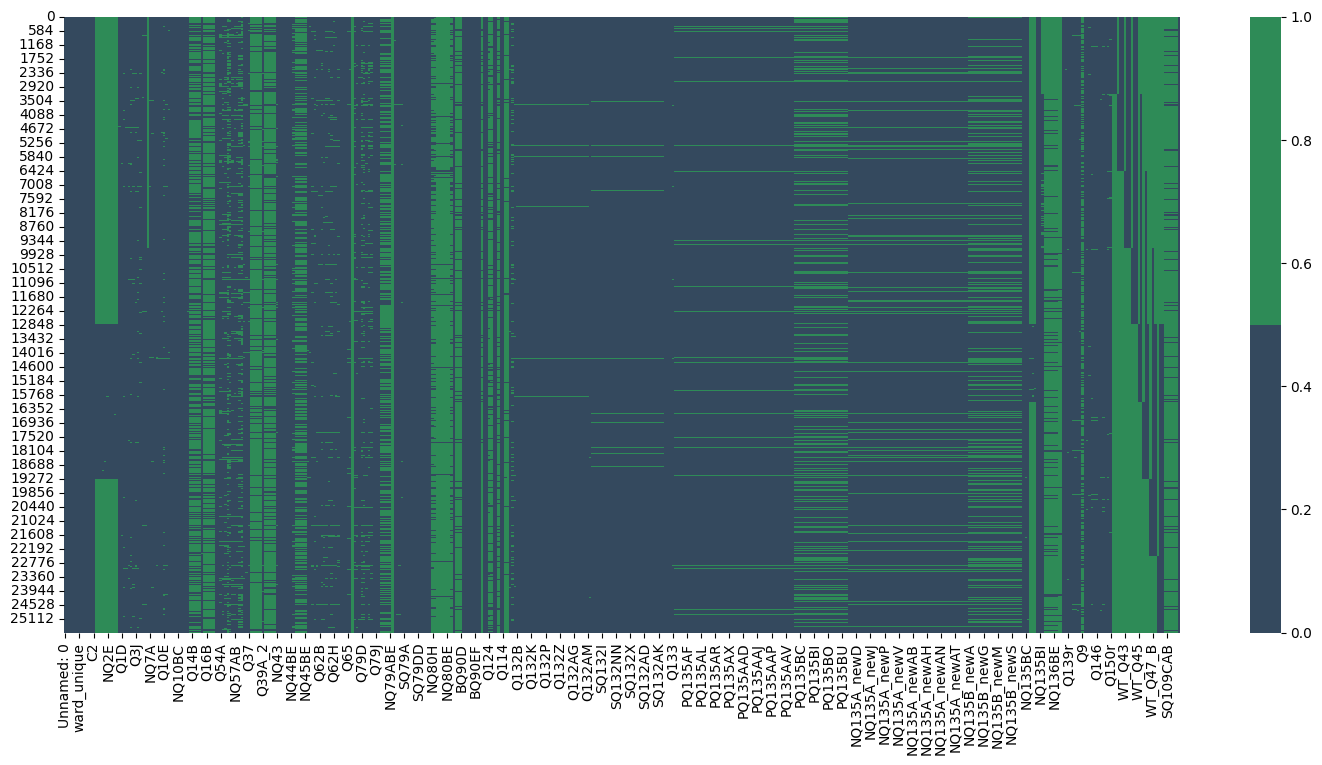

In [77]:
### Missing values
def plot_NAN(data):
    plt.figure(figsize=(18,8))

    colours = ['#34495E', 'seagreen'] 
    sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

plot_NAN(data_15_17)

In [100]:
data_15_17.head()

,Unnamed: 0,interview_date,MONTH,FinancialYear,ward,ward_n,ward_unique,SOA1,SOA2,BOROUGHNEIGHBOURHOOD,...,WT_Q48,WT_Q48_B,WT_Q48_E,SQ109CAA,SQ109CAB,SQ109CAC,SQ109CAD,SQ109CAE,SQ109CAF,datetime
0,1,1.364783e+10,49 (Apr 2015),2015/16,E05009388,Abingdon,Abingdon - Kensington and Chelsea ...,E01002812,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01
1,2,1.364783e+10,49 (Apr 2015),2015/16,E05009388,Abingdon,Abingdon - Kensington and Chelsea ...,E01002812,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01
2,3,1.364766e+10,49 (Apr 2015),2015/16,E05009401,Queen's Gate,Queen's Gate - Kensington and Chelsea ...,E01002888,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01
3,4,1.364766e+10,49 (Apr 2015),2015/16,E05009401,Queen's Gate,Queen's Gate - Kensington and Chelsea ...,E01002888,E02000589,Kensington and Chelsea - Kensington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01
4,5,1.364999e+10,50 (May 2015),2015/16,E05009403,Royal Hospital,Royal Hospital - Kensington and Chelsea ...,E01002901,E02000594,Kensington and Chelsea - Chelsea,...,NaN,NaN,NaN,-,Police (other than Local Policing Team),-,-,-,-,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25666,25667,1.370719e+10,71 (Feb 2016),2016/17,E05000570,Wallington South,Wallington South - Sutton ...,E01004177,E02000859,Sutton - East,...,0.514958,0.514677,0.514677,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
25667,25668,1.370710e+10,71 (Feb 2016),2016/17,E05000569,Wallington North,Wallington North - Sutton ...,E01004170,E02000856,Sutton - East,...,0.622626,0.622286,0.622286,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
25668,25669,1.370943e+10,72 (Mar 2016),2016/17,E05000571,Wandle Valley,Wandle Valley - Sutton ...,E01004185,E02000840,Sutton - North,...,0.367330,0.367130,0.367130,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01
25669,25670,1.370943e+10,72 (Mar 2016),2016/17,E05000571,Wandle Valley,Wandle Valley - Sutton ...,E01004188,E02000843,Sutton - North,...,0.900945,0.900453,0.900453,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-01


In [3]:
### Functions to create datetime for entire data set

def month_transformation(month):
    month_info = {
        'Jan': 1,
        'Feb': 2, # For leap years, February has 29 days
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }
    return  month_info[month]

def data_creation(row, col):
    month = row[col].split()[1][1:]
    year = row[col].split()[2][:-1]
    date_str = f'01/{month_transformation(month)}/{year}' # day of an interview unvailable -> always equal to 01
    date = pd.to_datetime(date_str,  format='%d/%m/%Y')
    return date


data_15_17["datetime"] = data_15_17.apply(data_creation, axis=1, args=("MONTH", ))


In [4]:
data_17_18["datetime"] = data_17_18.apply(data_creation, axis=1, args=("MONTH", ))

In [30]:
data_18_19["datetime"] = data_18_19.apply(data_creation, axis=1, args=("MONTH", ))

In [19]:
data_15 = data_15_17[data_15_17["datetime"].dt.year == 2015]
data_16 = data_15_17[data_15_17["datetime"].dt.year == 2016]
data_17 = data_15_17[data_15_17["datetime"].dt.year == 2017]

In [18]:
data_17_1 = data_17_18[data_17_18["datetime"].dt.year == 2017]
data_18 = data_17_18[data_17_18["datetime"].dt.year == 2018]

In [31]:
data_18_1 = data_18_19[data_18_19["datetime"].dt.year == 2018]
data_19 = data_18_19[data_18_19["datetime"].dt.year == 2019]

In [29]:
data_17_1

,Unnamed: 0,interview_date,MONTH,FinancialYear,ward,ward_n,WARD_1,ward_unique,WARD_0,SOA1,...,WT_Q50,WT_Q50_B,WT_Q50_E,WT_Q51,WT_Q51_B,WT_Q51_E,WT_Q52,WT_Q52_B,WT_Q52_E,datetime
0,1,1.372257e+10,77 (Aug 2017),13,E05000098,Queens Park,,Queens Park - Brent,,E01000581,...,5.127788,5.132995,5.132995,NaN,5.132995,5.132995,NaN,5.132995,5.132995,2017-08-01
1,2,1.371902e+10,76 (Jul 2017),13,E05000100,Stonebridge,,Stonebridge - Brent,,E01000595,...,5.127788,5.132995,5.132995,NaN,5.132995,5.132995,NaN,5.132995,5.132995,2017-07-01
2,3,1.372231e+10,77 (Aug 2017),13,E05000102,Tokyngton,,Tokyngton - Brent,,E01000618,...,5.127788,5.132995,5.132995,NaN,5.132995,5.132995,NaN,5.132995,5.132995,2017-08-01
3,4,1.372257e+10,77 (Aug 2017),13,E05000105,Willesden Green,,Willesden Green - Brent,,E01000644,...,5.127788,5.132995,5.132995,NaN,5.132995,5.132995,NaN,5.132995,5.132995,2017-08-01
4,5,1.371989e+10,76 (Jul 2017),13,E05000120,Kelsey and Eden Park,,Kelsey and Eden Park - Bromley,,E01032568,...,5.127788,5.132995,5.132995,NaN,5.132995,5.132995,NaN,5.132995,5.132995,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12803,12804,1.371090e+10,73 (Apr 2017),13,E05009405,Stanley,,Stanley - Kensington & Chelsea,,E01002910,...,NaN,0.345774,0.345774,NaN,0.345774,0.345774,NaN,0.345774,0.345774,2017-04-01
12804,12805,1.371332e+10,74 (May 2017),13,E05009405,Stanley,,Stanley - Kensington & Chelsea,,E01002910,...,NaN,0.629870,0.629870,NaN,0.629870,0.629870,NaN,0.629870,0.629870,2017-05-01
12805,12806,1.371332e+10,74 (May 2017),13,E05009405,Stanley,,Stanley - Kensington & Chelsea,,E01002823,...,NaN,0.761235,0.761235,NaN,0.761235,0.761235,NaN,0.761235,0.761235,2017-05-01
12806,12807,1.372706e+10,79 (Oct 2017),13,E05009405,Stanley,,Stanley - Kensington and Chelsea,,E01002913,...,NaN,NaN,NaN,0.496366,0.496560,0.496560,NaN,0.496560,0.496560,2017-10-01


<Axes: >

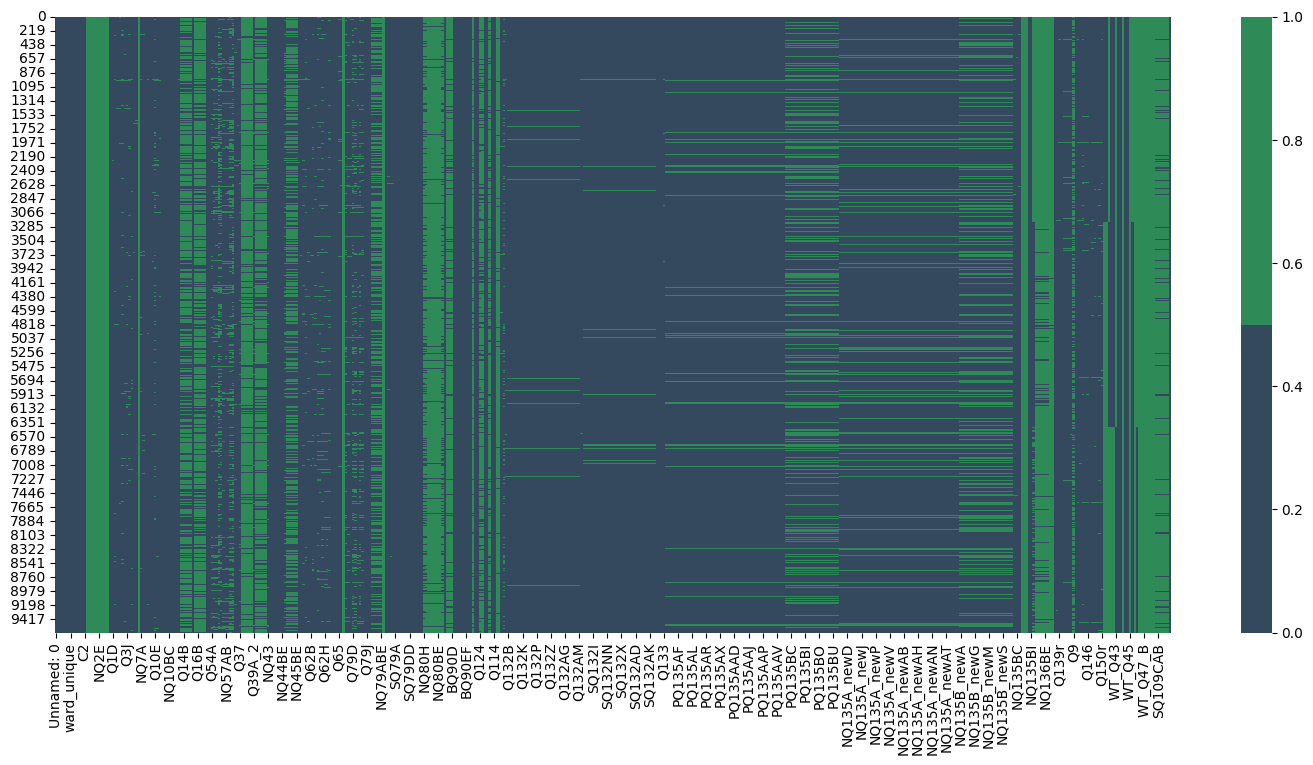

In [47]:

plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(data_15.isnull(), cmap=sns.color_palette(colours))

In [61]:
column_drop = ["BOROUGHNEIGHBOURHOOD",
    "Unnamed: 0",
    "interview_date",
    "MONTH",
    "FinancialYear",
    "ward",
    "SOA1",
    "SOA2",
    "quarter",
    "NQ1",
    "NQ2A",
    "NQ2B",
    "NQ2C",
    "NQ2D",
    "NQ2E",
    "NQ2F",
    "NQ2G",
    "NQ2H",
    "NQ21",
    "Q126DC",
    "NQ62A",
    "NQ62B",
    "Q106B"
]
data_15.drop(column_drop, axis='columns', inplace=True)

C:\Users\Marceli Morawski\AppData\Local\Temp\ipykernel_8752\4001728010.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_15.drop(column_drop, axis='columns', inplace=True)


In [20]:
picked_columns = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q126DA",
    "Q126DB",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "Q119",
    "Q110",
    "Q114",
    "NQ119",
    "PQ119",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
]

data_15_special = data_15[picked_columns]
data_16_special = data_16[picked_columns]
data_17_special = data_17[picked_columns]


In [26]:
#New columns in 17-18 that were not here before
data_17_1.columns.difference(data_17.columns)

Index(['BOROU0', 'BOROU1', 'BOROUGHNEIGHBOURHOODCODED', 'WARD_0', 'WARD_1',
       'WT_Q49', 'WT_Q49_B', 'WT_Q49_E', 'WT_Q50', 'WT_Q50_B', 'WT_Q50_E',
       'WT_Q51', 'WT_Q51_B', 'WT_Q51_E', 'WT_Q52', 'WT_Q52_B', 'WT_Q52_E',
       'XQ106B', 'XQ119A', 'XQ119B', 'XQ122', 'XQ123', 'XQ192', 'XQ21A',
       'XQ21B', 'XQ21C', 'XQ21D', 'XQ21E', 'XQ3A', 'XQ3B', 'XQ57A', 'XQ57B',
       'XQ57C', 'XQ8', 'XQ81', 'XQ81A', 'XQ81B', 'XQ9A', 'XQ9B', 'ZNQ10A',
       'ZNQ10BA', 'ZNQ10BB', 'ZNQ10BC', 'ZNQ10BD', 'ZNQ10BE', 'ZNQ10BF',
       'ZNQ119', 'ZPQ119', 'ZQ10A', 'ZQ10B', 'ZQ10C', 'ZQ10D', 'ZQ10E',
       'ZQ10F', 'ZQ10H', 'ZQ110'],
      dtype='object')

In [24]:
# Old columns that were removed in the new 17-18 
data_17_special.columns.difference(data_17_1.columns)
'''
NQ119: Prior to this experience, was your overall opinion of the police...? *** weird classification - changed it to XQ119A

PQ119: As a result of your contact with the police on this occasion, 
please tell me if your opinion is now better, worse or has not changed? *** - strange colour - changed it to XQ119A

Q110: Including anything you've already mentioned, 
in the last 12 months have the police stopped you while you were in the car or on foot? -- can be removed

Q114: In the last 12 months have the police searched or arrested you? * -- can be replaced NQ80BD

Q119: Thinking about all the times you have had contact with the police, 
are you satisfied, dissatisfied or neither with the service the police provided? - changed it to XQ119A

Q126DA How important is it to you that you have a say in how your local area is policed?  ** -- can be removed

Q126DB How important is it to you that you have a say in how London as a whole is policed? *** -- can be removed
'''

Index(['NQ119', 'PQ119', 'Q110', 'Q114', 'Q119', 'Q126DA', 'Q126DB'], dtype='object')

In [28]:
picked_columns_17_18 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
    #NEW QUESTIONS
    "XQ106B",
    "NQ146",
    "XQ122",
    "XQ123",
    "XQ21A",
    "XQ21C",
    "XQ57A",
    "XQ57B",
    "XQ57C",
    "XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F"
]
data_17_1_special = data_17_1[picked_columns_17_18]
data_18_special = data_18[picked_columns_17_18]

In [33]:
#New columns in 18-19 that were not here before
data_18_1.columns.difference(data_18.columns)

Index(['NQ135BK', 'NQ135BL', 'NQ135BM', 'NQ135BN', 'NQ46A', 'NQ46BA', 'NQ46BB',
       'NQ46BC', 'NQ46BD', 'NQ46BE', 'NQ47A', 'NQ47BA', 'NQ47BB', 'NQ47BC',
       'NQ47BD', 'NQ47BE', 'WT_Discrete', 'WT_Discrete_rebased', 'WT_Q53',
       'WT_Q53_B', 'WT_Q53_E', 'WT_Q54', 'WT_Q54_B', 'WT_Q54_E', 'WT_Q55',
       'WT_Q55_B', 'WT_Q55_E', 'WT_Q56', 'WT_Q56_B', 'WT_Q56_E', 'XBQ90A',
       'XQ57D', 'XQ59A', 'XQ59B', 'XQ59C', 'XQ59D', 'XQ82A', 'XQ82B', 'ZQ10I',
       'ZQ10J'],
      dtype='object')

In [34]:
# Old columns that were removed in the new 18-19 
data_18_special.columns.difference(data_18_1.columns)
# XQ21C: Some communities and individuals in your local area are more likely to experience crime than others

Index(['XQ21C'], dtype='object')

In [35]:
picked_columns_18_19 = [
    "datetime",
    "Q1",
    "Q3C",
    "Q3H",
    "Q3J",
    "Q13",
    "Q14A",
    "Q14B",
    "Q14C",
    "Q14D",
    "Q14E",
    "Q15",
    "NQ21",
    "NQ57AA",
    "NQ57AB",
    "NQ57AC",
    "NQ57AD",
    "NQ57AE",
    "Q39A_2",
    "Q60",
    "Q61",
    "Q62A",
    "Q62B",
    "Q62C",
    "Q62D",
    "Q62E",
    "Q62F",
    "Q62TG",
    "Q62H",
    "Q62TI",
    "Q62TJ",
    "NQ62A",
    "NQ62B",
    "Q65",
    "Q66",
    "Q79A",
    "Q79B",
    "Q79C",
    "Q79D",
    "Q79E",
    "Q79F",
    "Q79G",
    "Q79H",
    "Q79I",
    "Q79J",
    "A120",
    "Q133",
    "NQ135BD",
    "XQ135r",
    "Q136r",
    "Q139r",
    "NQ155r",
    "Q131",
    "Q148",
    "NQ149r",
    "Q150r",
    "XQ106B",
    "NQ146",
    "XQ122",
    "XQ123",
    "XQ21A",
    "XQ57A",
    "XQ57B",
    "XQ57C",
    "XQ8",
    "ZQ10A",
    "ZQ10B",
    "ZQ10C",
    "ZQ10D",
    "ZQ10E",
    "ZQ10F",
    #NEW QUESTIONS
    "NQ46A",
    "NQ46BA",
    "ZQ10I",
    "ZQ10J"
]
data_18_1_special = data_18_1[picked_columns_18_19]
data_19_special = data_19[picked_columns_18_19]

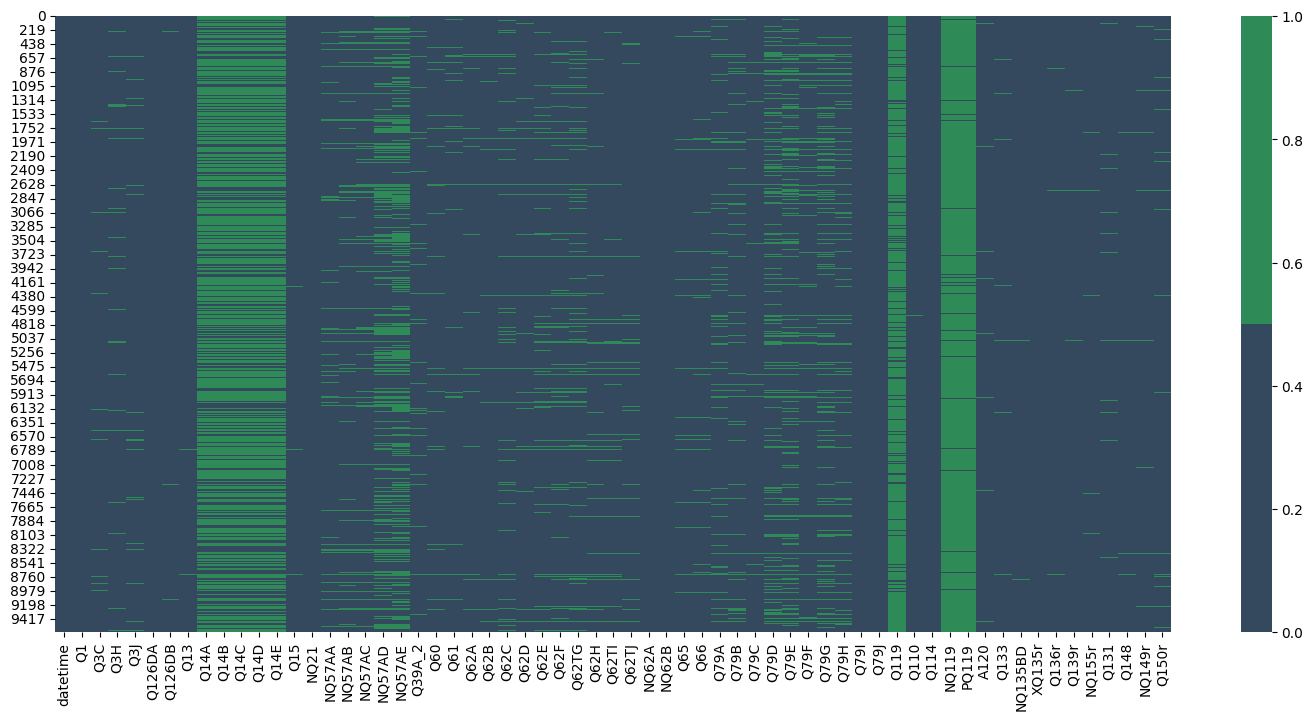

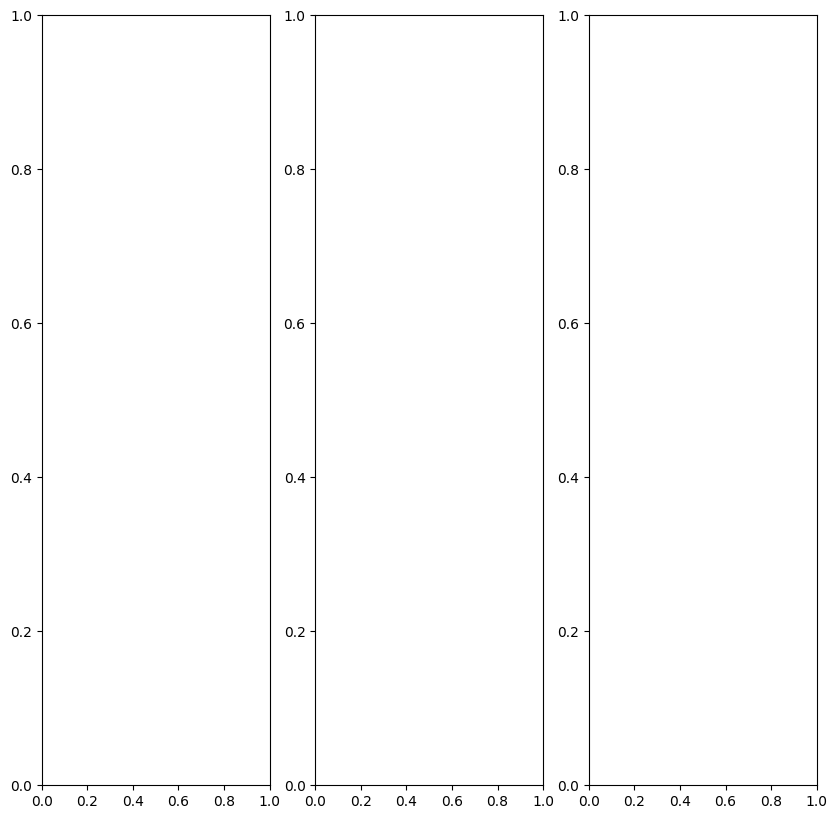

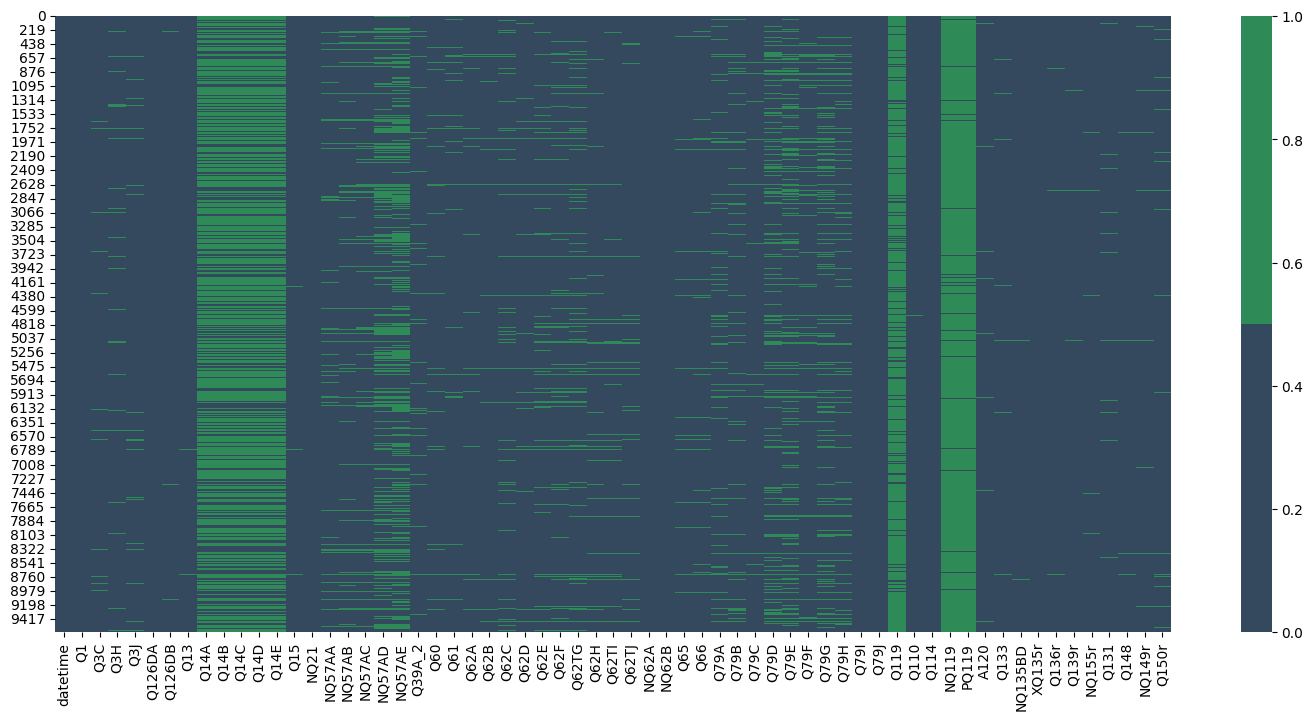

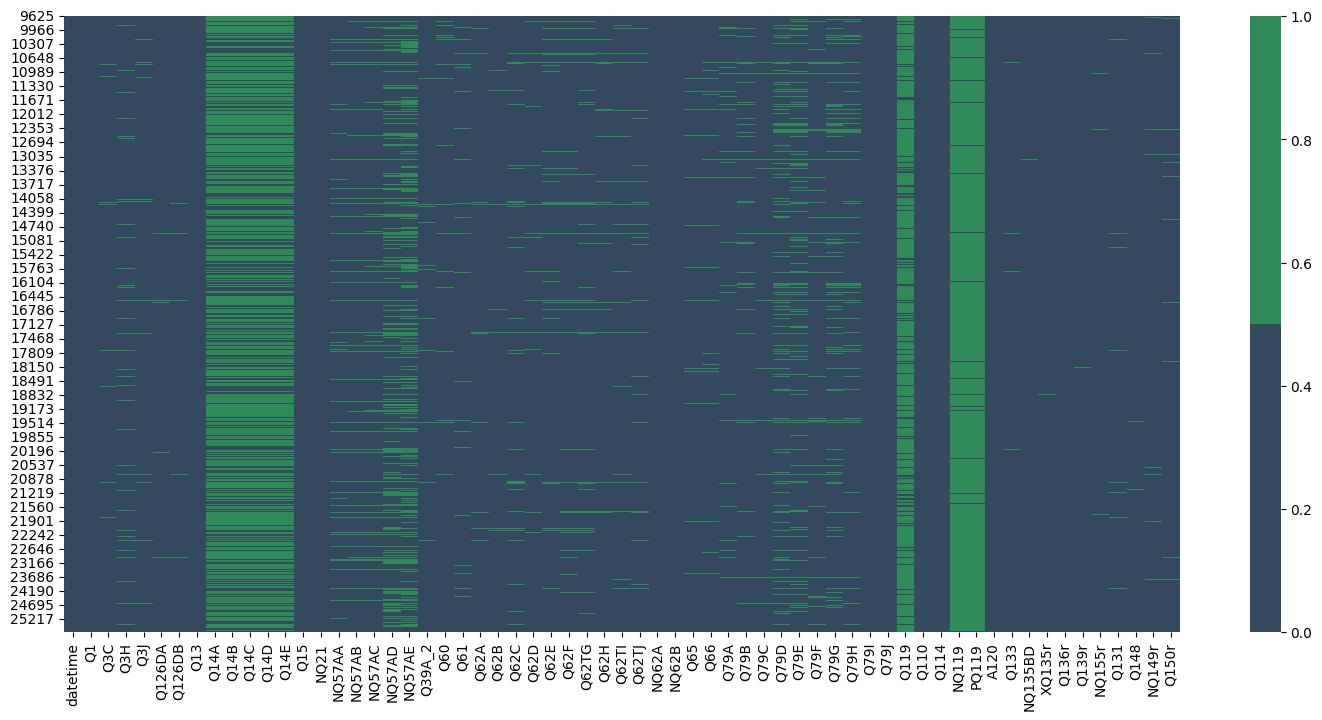

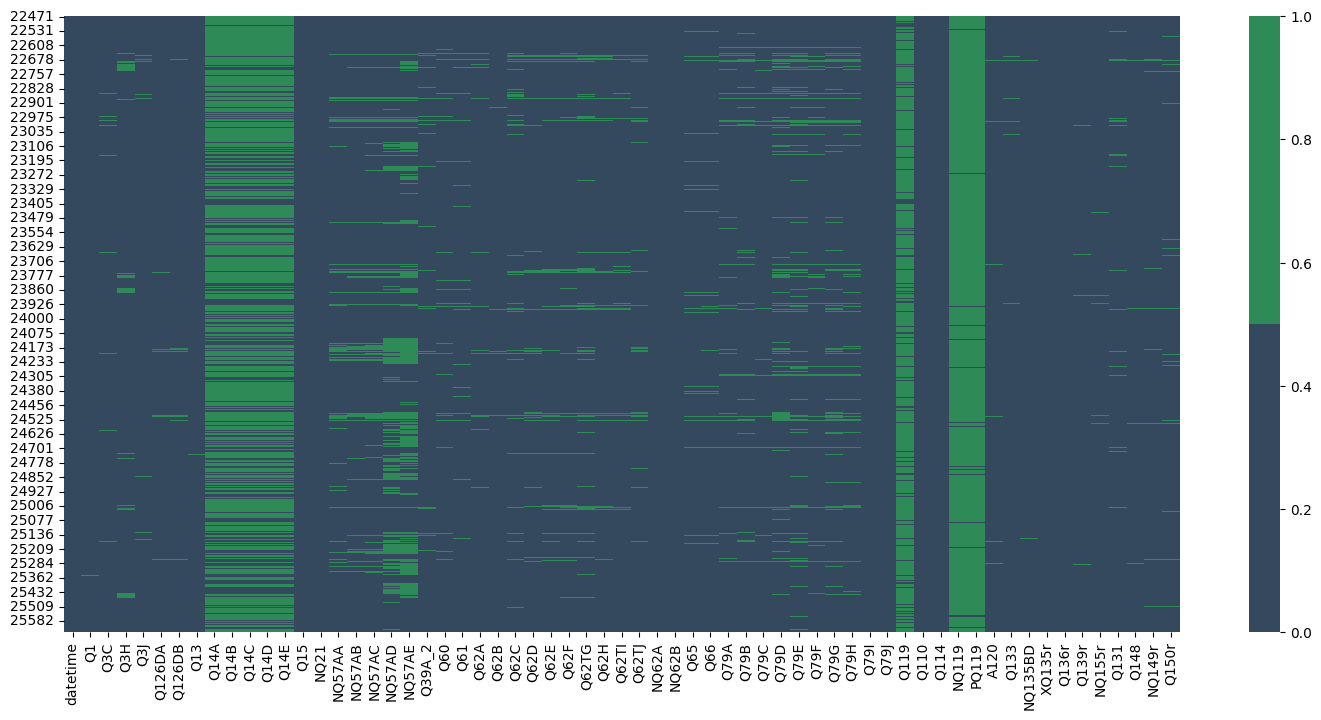

In [83]:
plot_NAN(data_15_special)

fig, axs = plt.subplots(1,3, figsize=(10, 10), sharex=True)

axs[0] = plot_NAN(data_15_special)
axs[1] = plot_NAN(data_16_special)
axs[2] = plot_NAN(data_17_special)

In [107]:

### strange in 2017 there are 1070 rows of only questions from 2017
data_15_special.shape, data_16_special.shape, data_17_special.shape
months_2017 = set()
for date in data_15_17["MONTH"]:
    month = date.split()[1][1:]
    year = date.split()[2][:-1]
    if year == "2017":
        months_2017.add(month)


months_2017, data_15_special.shape, data_16_special.shape, data_17_special.shape

({'Jan'}, (9625, 63), (14981, 63), (1070, 63))

# Encoding values